In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import pickle

import seaborn as sns
sns.set()
from matplotlib import style
style.use('ggplot')

In [24]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [25]:
table = data[0]
header = table.iloc[0]
table.head()

,0,1,2,3,4,5,6,7,8
0,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
1,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740,1902
2,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981


In [26]:
header

0                   Symbol
1                 Security
2              SEC filings
3              GICS Sector
4        GICS Sub Industry
5    Headquarters Location
6         Date first added
7                      CIK
8                  Founded
Name: 0, dtype: object

In [27]:
table = table[1:]
table.head()

,0,1,2,3,4,5,6,7,8
1,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740,1902
2,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
5,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


In [28]:
table = table.rename(columns=header)
table.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
1,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740,1902
2,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
5,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


In [30]:
tickers = table['Symbol'].tolist()
len(tickers)

505

In [3]:
with open('data/sp500tickers.pickle', 'rb') as f:
    tickers = pickle.load(f)
len(tickers)

505

In [4]:
prices = pd.read_csv('sp500_closes.csv', index_col='Date', parse_dates=True)
prices.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,79.758415,27.926201,27.193508,13.69,59.578766,10.310681,38.340000,2.53,71.585838,8.837808,...,78.928162,97.898666,21.486698,15.530575,31.753428,24.999222,42.287354,63.767414,20.332291,NaN
2013-01-03,79.665848,28.989225,26.968964,13.45,59.363071,10.367179,37.750000,2.49,71.585838,8.789598,...,79.734497,98.951675,21.423912,15.530575,31.693514,24.917400,42.551826,64.681076,20.360031,NaN
2013-01-04,80.254913,28.814959,26.628265,13.41,59.690914,10.517838,38.130001,2.59,72.701752,8.998492,...,79.711494,100.145653,21.502390,15.357772,31.248316,24.881042,43.017757,65.010742,20.942539,NaN
2013-01-07,80.355881,29.050213,26.682472,13.25,59.432095,10.527254,37.939999,2.67,72.454865,8.717291,...,79.481110,100.485619,21.274820,15.616977,31.119894,24.553778,42.746994,65.170853,20.840830,NaN
2013-01-08,80.364304,29.058924,26.101748,13.21,59.777180,10.348347,38.139999,2.67,71.269798,8.717291,...,79.089447,100.402710,21.314045,15.595379,30.486374,24.253788,40.952507,65.265068,20.424749,NaN


In [5]:
prices = prices[:-1]

In [6]:
daily_rets = prices.copy()
daily_rets.values[1:, :] = prices.values[1:, :] / prices.values[:-1, :] - 1
daily_rets.values[0, :] = np.nan  
daily_rets = daily_rets[1:-1]
daily_rets = daily_rets.reset_index()
daily_rets

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,2013-01-03,-0.001161,0.038065,-0.008257,-0.017531,-0.003620,0.005480,-0.015389,-0.015810,0.000000,...,0.010216,0.010756,-0.002922,0.000000,-0.001887,-0.003273,0.006254,0.014328,0.001364,NaN
1,2013-01-04,0.007394,-0.006011,-0.012633,-0.002974,0.005523,0.014532,0.010066,0.040161,0.015588,...,-0.000288,0.012066,0.003663,-0.011127,-0.014047,-0.001459,0.010950,0.005097,0.028610,NaN
2,2013-01-07,0.001258,0.008164,0.002036,-0.011931,-0.004336,0.000895,-0.004983,0.030888,-0.003396,...,-0.002890,0.003395,-0.010583,0.016878,-0.004110,-0.013153,-0.006294,0.002463,-0.004857,NaN
3,2013-01-08,0.000105,0.000300,-0.021764,-0.003019,0.005806,-0.016995,0.005272,0.000000,-0.016356,...,-0.004928,-0.000825,0.001844,-0.001383,-0.020357,-0.012218,-0.041979,0.001446,-0.019965,NaN
4,2013-01-09,0.009529,0.006597,0.005636,-0.028009,0.007072,-0.004550,0.013634,-0.014981,0.003049,...,-0.000291,0.003551,0.001473,0.000000,0.007863,0.015742,0.001777,0.018473,-0.010865,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,2019-10-01,-0.036618,-0.021872,-0.032884,-0.043173,-0.014193,-0.000378,-0.012815,-0.007934,0.011427,...,-0.026118,0.011037,NaN,-0.014711,-0.040250,-0.035041,NaN,-0.026663,-0.034816,0.004254
1698,2019-10-02,-0.017237,-0.028226,-0.015021,-0.040068,-0.025156,-0.012287,-0.022185,-0.015647,-0.025883,...,-0.019795,0.011554,NaN,-0.016966,0.004455,-0.028895,NaN,-0.012424,-0.016523,-0.022618
1699,2019-10-03,-0.002698,0.019364,0.023846,0.022278,0.005193,0.034833,0.021526,0.013070,-0.019023,...,0.004234,-0.011962,NaN,0.012427,0.000433,0.006836,NaN,0.007503,0.010175,0.016273
1700,2019-10-04,0.003801,0.011348,0.010968,0.013291,0.020612,0.025338,0.016740,0.011506,0.000500,...,0.019785,-0.008647,NaN,0.008865,0.018921,0.011315,NaN,0.011358,0.011947,0.022288


In [7]:
# df = prices.T
df = daily_rets.T
header = df.iloc[0]
df = df[1:].rename(columns=header)
df = df.reset_index()
df.head()

,index,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,2013-01-11 00:00:00,2013-01-14 00:00:00,2013-01-15 00:00:00,...,2019-09-24 00:00:00,2019-09-25 00:00:00,2019-09-26 00:00:00,2019-09-27 00:00:00,2019-09-30 00:00:00,2019-10-01 00:00:00,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-07 00:00:00
0,MMM,-0.0011606,0.0073942,0.00125808,0.000104819,0.00952883,0.00497852,-0.0062957,0.00830893,0.00216338,...,-0.0121132,-0.00449196,-0.00103657,0.0042727,-0.000790159,-0.0366179,-0.0172371,-0.00269835,0.00380089,-0.0147606
1,ABT,0.0380655,-0.00601143,0.00816431,0.000299855,0.00659681,0.00834071,-0.0100858,-0.000299849,-0.0101917,...,-0.00865802,0.00509459,-0.00241367,-0.00992024,0.0223607,-0.0218717,-0.0282258,0.0193638,0.0113482,-0.0115867
2,ABBV,-0.00825728,-0.012633,0.00203569,-0.0217643,0.00563639,0.00294943,0.00744051,0.00709041,0.0149602,...,0.00027419,-0.0117889,0.0269108,0.0110766,0.0116233,-0.0328843,-0.0150212,0.0238459,0.0109682,-0.00442006
3,ABMD,-0.017531,-0.00297397,-0.0119314,-0.00301887,-0.0280091,-0.00311526,-0.0429688,0.00571426,-0.0121753,...,-0.00892419,0.00504471,-0.0411809,-0.00990709,0.0113707,-0.0431727,-0.0400682,0.022278,0.013291,-0.0284786
4,ACN,-0.00362032,0.00552267,-0.004336,0.00580638,0.00707169,-0.00874169,0.0102646,-0.000286326,0.00558265,...,-0.0140012,0.00383925,0.00654896,-0.00385171,0.00506846,-0.0141929,-0.0251555,0.00519335,0.0206125,-0.014923


In [8]:
dates = df.columns[1:]
dates[len(dates)-1]

Timestamp('2019-10-07 00:00:00')

In [9]:
pred_steps = 30
data_start_date = dates[1]
data_end_date = dates[-1]

val_pred_start = dates[len(dates) - pred_steps]
val_pred_end = dates[len(dates) - 1]

train_pred_start = dates[len(dates) - 2*pred_steps]
train_pred_end = dates[len(dates) - pred_steps - 1]

enc_length = len(dates) - 2 * pred_steps
train_enc_start = dates[0]
train_enc_end = dates[enc_length - 1]

val_enc_start = dates[pred_steps]
val_enc_end = dates[pred_steps + enc_length - 1]

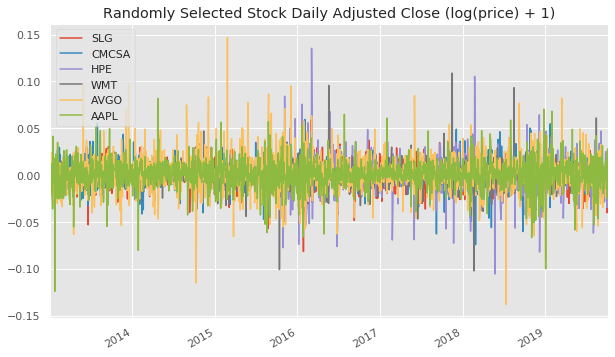

In [10]:
def plot_random_series(df, n_series):
    
    sample = df.sample(n_series, random_state=666)
    tickers = sample['index'].tolist()
    series_samples = sample.loc[:,data_start_date:data_end_date]
    
    plt.figure(figsize=(10,6))
    
    for i in range(series_samples.shape[0]):
#         np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
        pd.Series(series_samples.iloc[i]).astype(np.float64).plot(linewidth=1.5)
    
    plt.title('Randomly Selected Stock Daily Adjusted Close (log(price) + 1)')
    plt.legend(tickers)
    
plot_random_series(df, 6)

In [11]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

Train encoding: 2013-01-03 00:00:00 - 2019-07-12 00:00:00
Train prediction: 2019-07-15 00:00:00 - 2019-08-23 00:00:00 

Val encoding: 2013-02-15 00:00:00 - 2019-08-23 00:00:00
Val prediction: 2019-08-26 00:00:00 - 2019-10-07 00:00:00


In [12]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = np.array(df[df.columns[1:]].values, dtype=np.float)

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
#     series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = np.nan_to_num(series_array) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
#     series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = np.nan_to_num(series_array) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [13]:
# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)#[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)#[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

print(encoder_input_data.shape, encode_series_mean.shape, decoder_target_data.shape)

(503, 1642, 1) (503, 1) (503, 30, 1)


In [14]:
from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate, BatchNormalization
# from keras.optimizers import Adam
from keras import optimizers

Using TensorFlow backend.


In [17]:
# convolutional layer parameters
n_filters = 32
filter_width = 2
dilation_rates = [2**i for i in range(9)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))
x = history_seq
x_shortcut = x

for i in range(len(dilation_rates)):
    dilation_rate = dilation_rates[i]
#     print(x.shape)
    x = Conv1D(filters=n_filters, kernel_size=filter_width, padding='causal',
               dilation_rate=dilation_rate, name='conv'+str(i))(x)
#     x = BatchNormalization(name='bn'+str(i))(x)
#     print(x.shape)
#     print('--------------------')
    if (i % 2 != 0):
        x = Add()([x, x_shortcut])
        x_shortcut = x
    x = Activation('relu')(x)

x = Dense(128, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(1)(x)

# extract the last 14 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':pred_steps})(x)

model = Model(history_seq, pred_seq_train)
model.summary()

(?, ?, 1)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
(?, ?, 32)
(?, ?, 32)
--------------------
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
conv0 (Conv1D)                  (None, None, 32)     96          input_3[0][0]                    
__________________________________________________________________________________________________
act

In [ ]:
# first_n_samples = 120000
batch_size = 2**8
epochs = 20

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)#[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)#[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# we append a lagged history of the target series to the input data, 
# so that we can train with teacher forcing
lagged_target_history = decoder_target_data[:,:-1,:1]
encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(lr=1e-3)
model.compile(optimizer=adam, loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

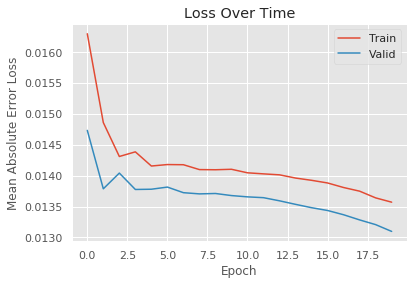

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

Train on 452 samples, validate on 51 samples
Epoch 1/180
452/452 [==============================] - 2s 4ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 2/180
452/452 [==============================] - 0s 492us/step - loss: 0.0134 - val_loss: 0.0130
Epoch 3/180
452/452 [==============================] - 0s 496us/step - loss: 0.0134 - val_loss: 0.0130
Epoch 4/180
452/452 [==============================] - 0s 493us/step - loss: 0.0134 - val_loss: 0.0130
Epoch 5/180
452/452 [==============================] - 0s 485us/step - loss: 0.0134 - val_loss: 0.0130
Epoch 6/180
452/452 [==============================] - 0s 487us/step - loss: 0.0134 - val_loss: 0.0129
Epoch 7/180
452/452 [==============================] - 0s 488us/step - loss: 0.0133 - val_loss: 0.0129
Epoch 8/180
452/452 [==============================] - 0s 487us/step - loss: 0.0133 - val_loss: 0.0129
Epoch 9/180
452/452 [==============================] - 0s 487us/step - loss: 0.0133 - val_loss: 0.0129
Epoch 10/180
452/452 [========

452/452 [==============================] - 0s 489us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 158/180
452/452 [==============================] - 0s 488us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 159/180
452/452 [==============================] - 0s 488us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 160/180
452/452 [==============================] - 0s 488us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 161/180
452/452 [==============================] - 0s 490us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 162/180
452/452 [==============================] - 0s 490us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 163/180
452/452 [==============================] - 0s 488us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 164/180
452/452 [==============================] - 0s 490us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 165/180
452/452 [==============================] - 0s 489us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 166/180
452/452 [==============================] - 0s 488us/ste

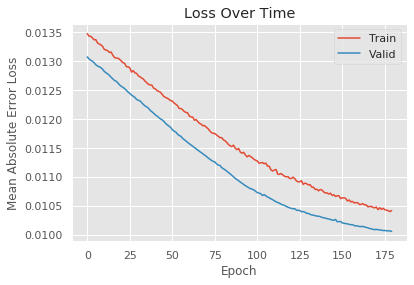

In [52]:
adam = optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam, loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=180,
                    validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [53]:
def predict_sequence(input_sequence):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence, 
                                           last_step_pred.reshape(-1,1,1)], axis=1)

    return pred_sequence

In [54]:
encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [55]:
encoder_input_data.shape, decoder_target_data.shape

((503, 1642, 1), (503, 30, 1))

In [56]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = predict_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Pred vs Actual, %s' % tickers[sample_ind])
    plt.legend(['Encoding Series','Target Series','Predictions'])

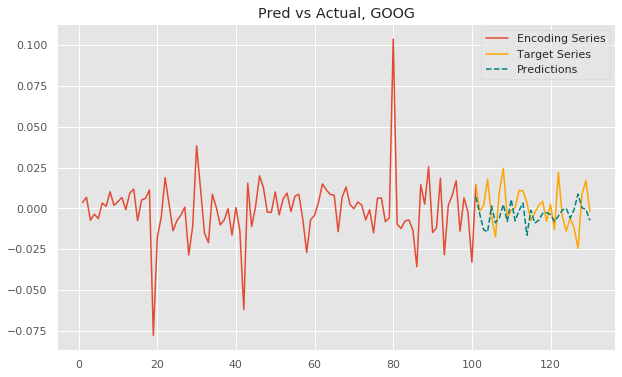

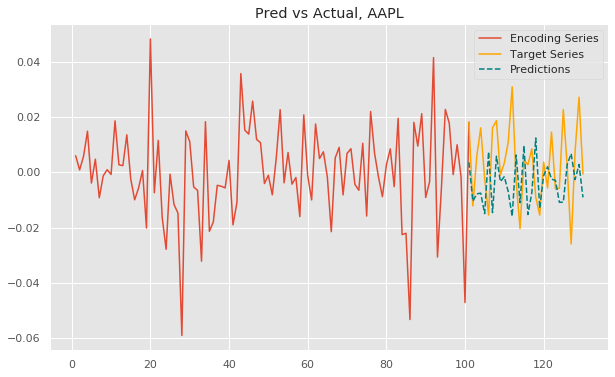

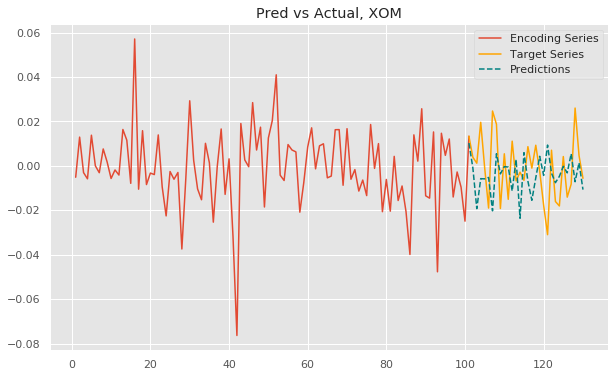

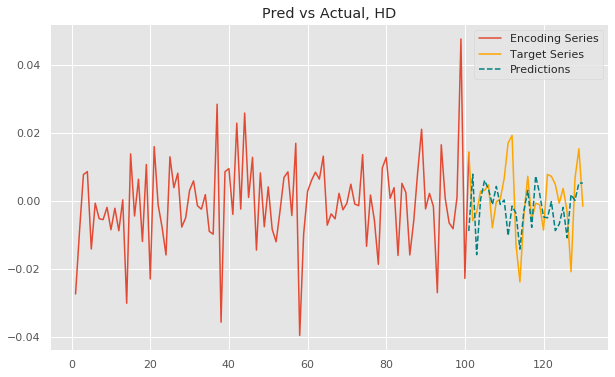

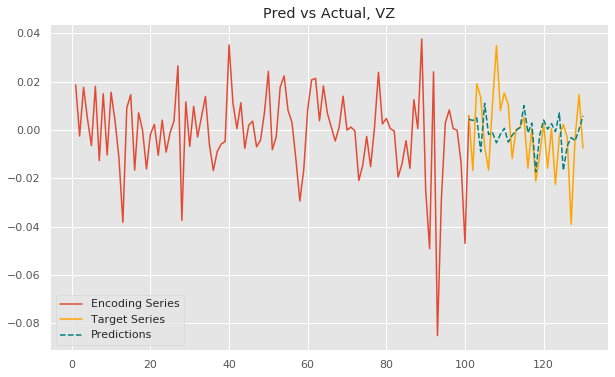

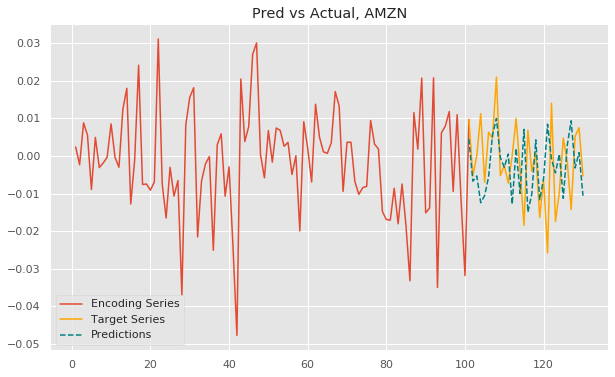

In [57]:
vis_ticks = ['GOOG', 'AAPL', 'XOM', 'HD', 'VZ', 'AMZN']
for ticker in vis_ticks:
    i = tickers.index(ticker)
    predict_and_plot(encoder_input_data, decoder_target_data, 
                 sample_ind=i, enc_tail_len=100)

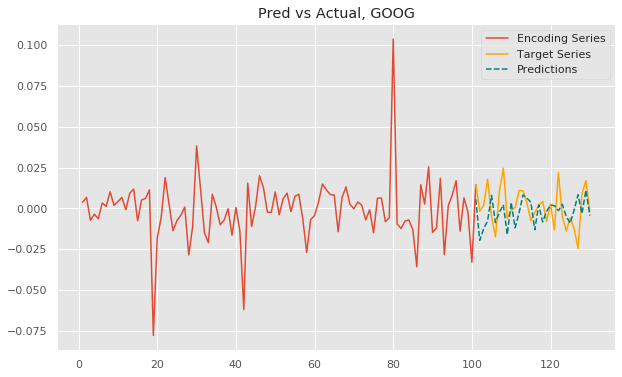

In [48]:
decoder_target_data[192]
predict_and_plot(encoder_input_data, decoder_target_data, 
                 sample_ind=26, enc_tail_len=100)

In [33]:
# tickers.index('FB')
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CDW',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CM

/nfs_shares/xzw0005_home/conda_envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


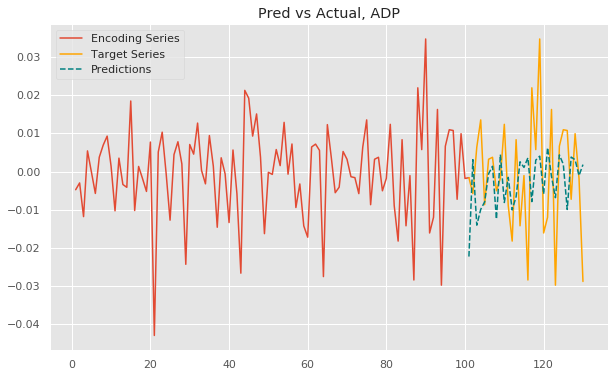

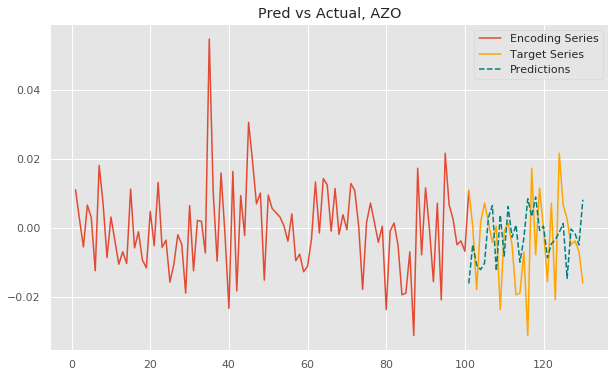

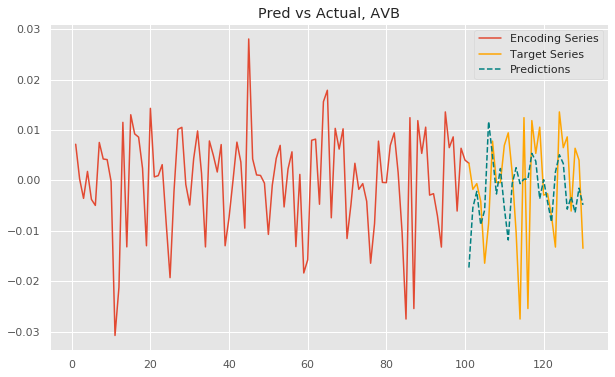

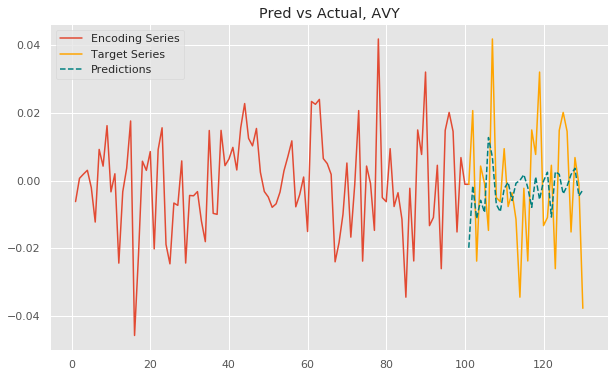

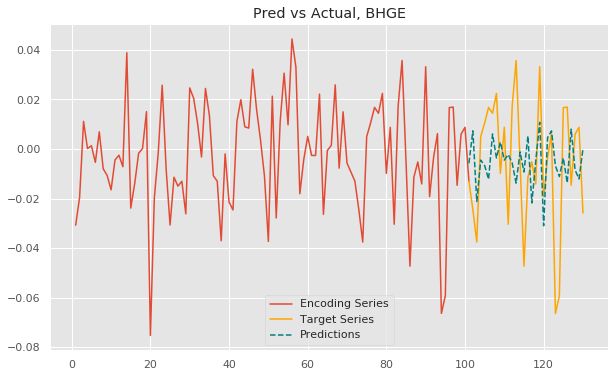

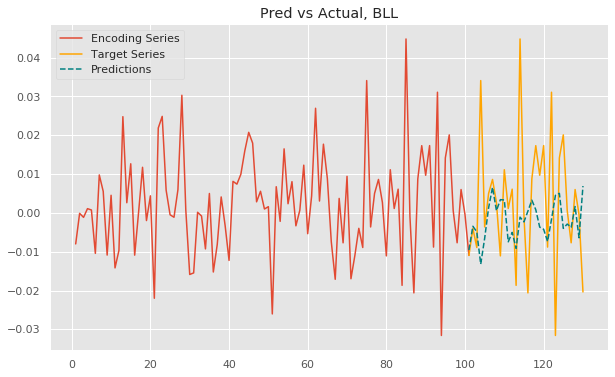

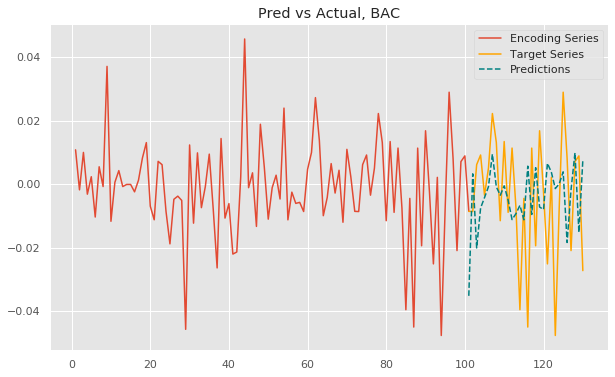

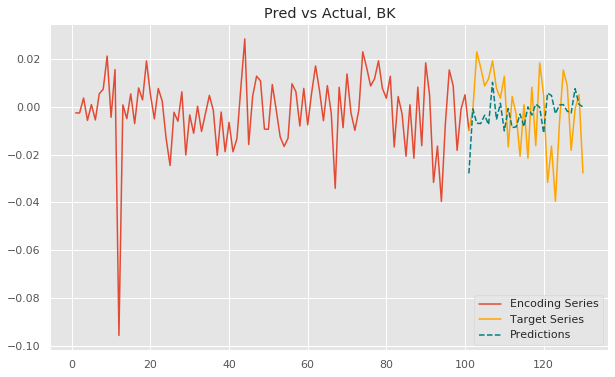

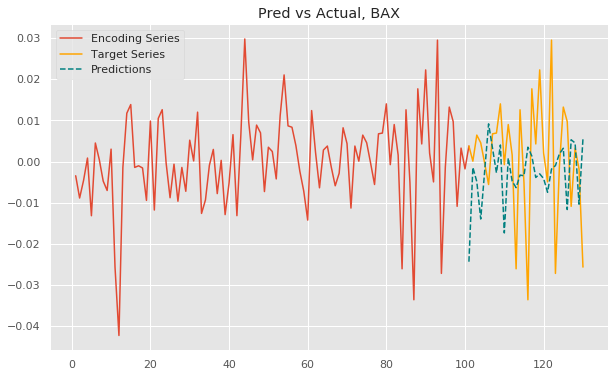

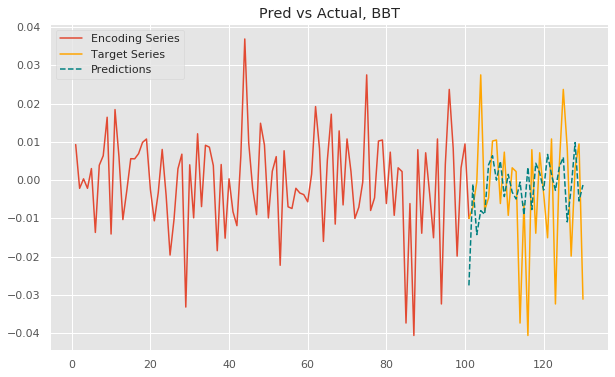

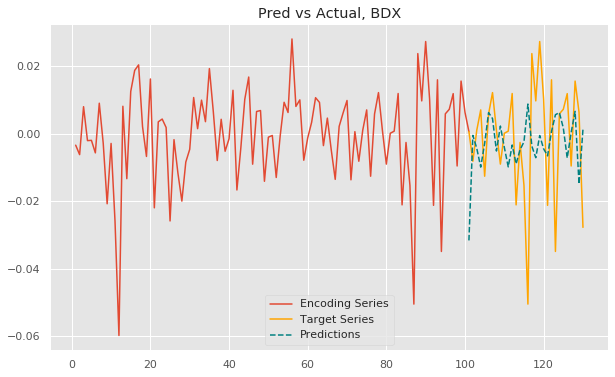

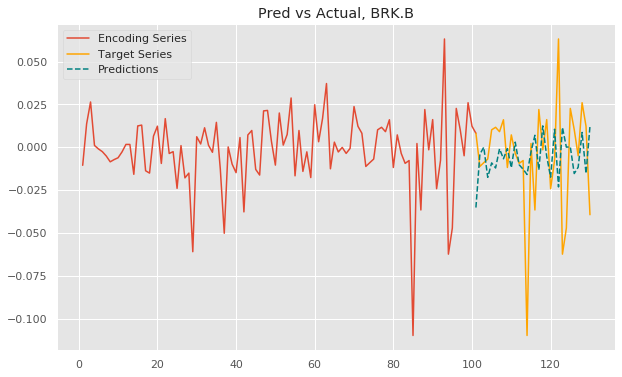

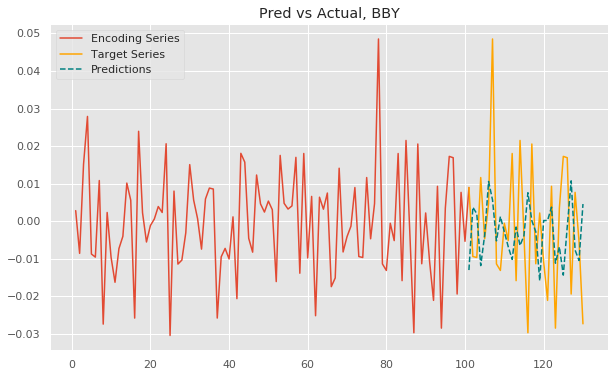

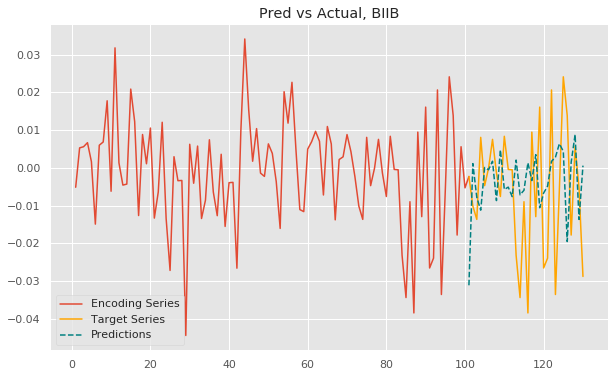

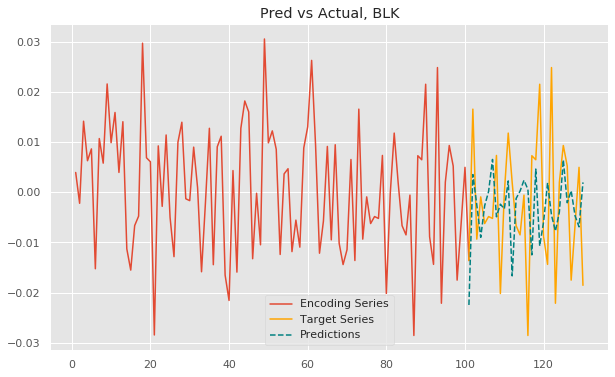

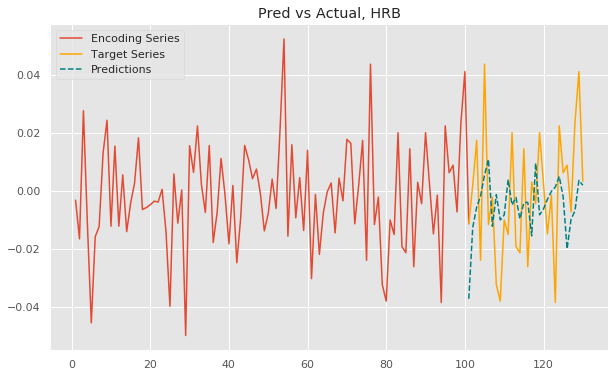

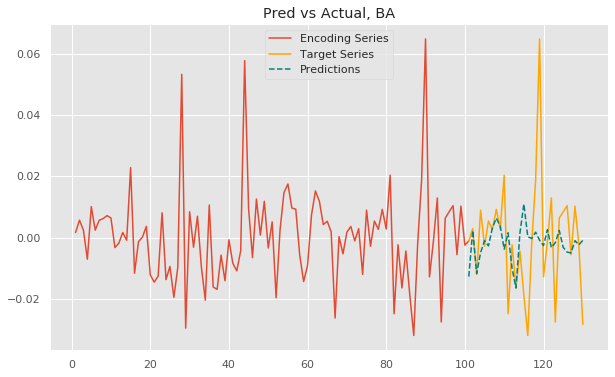

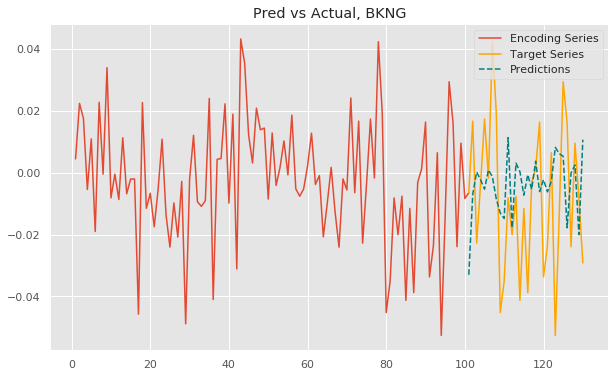

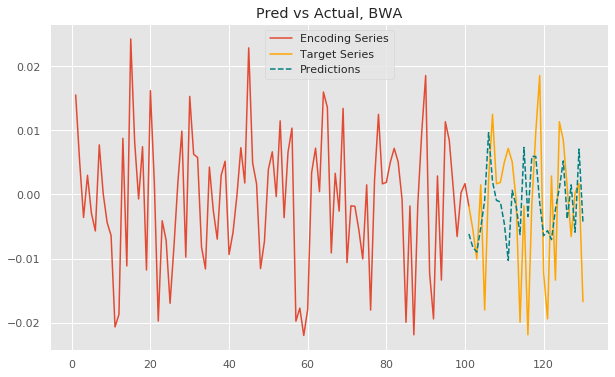

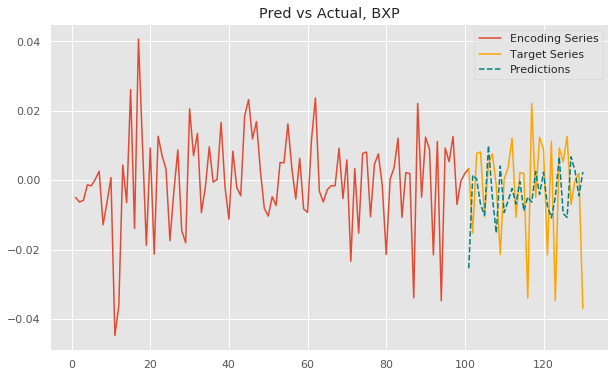

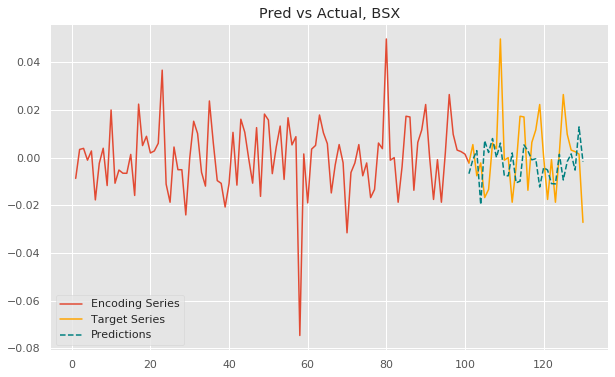

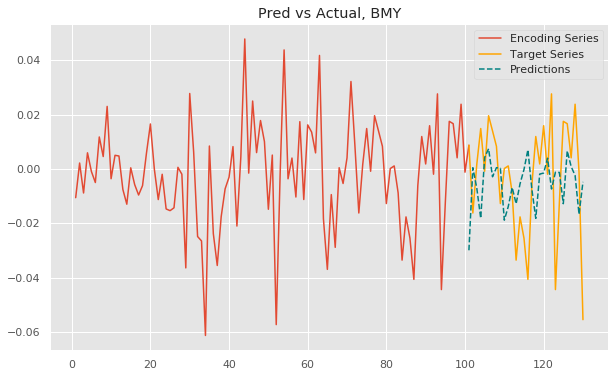

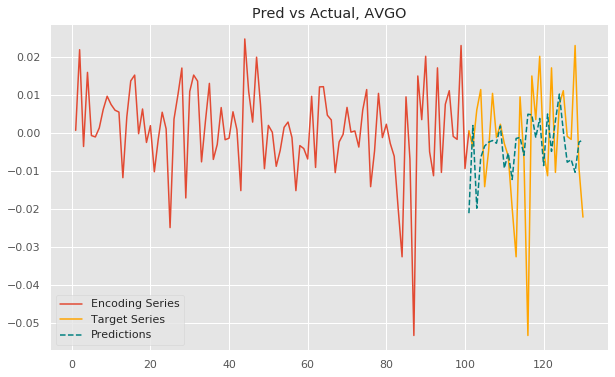

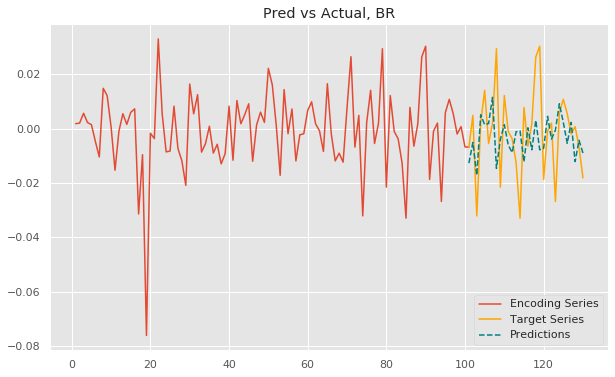

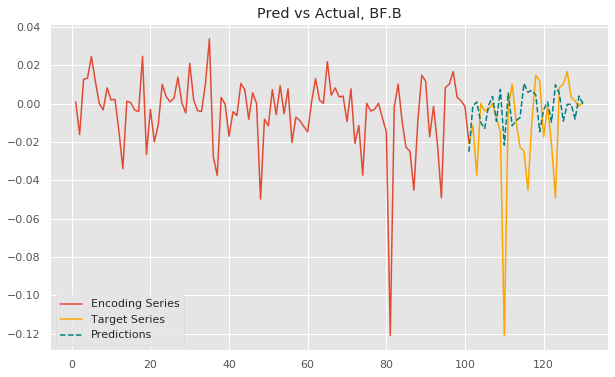

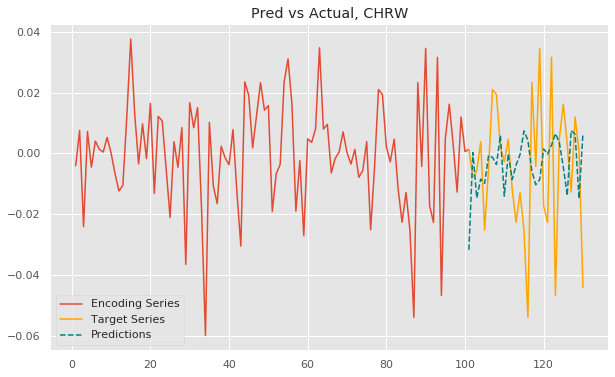

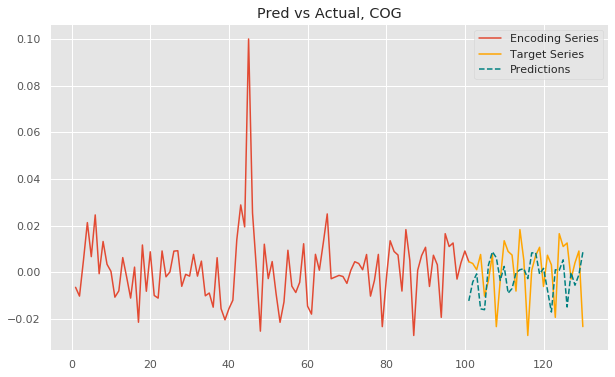

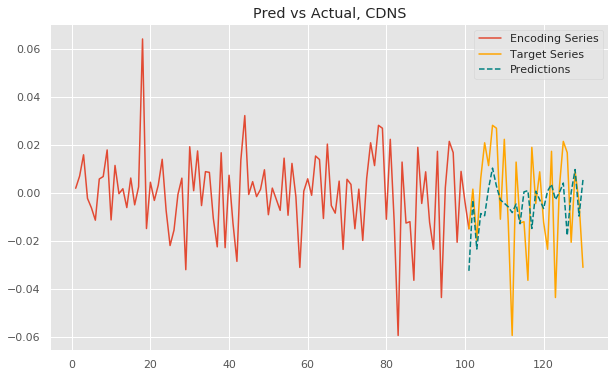

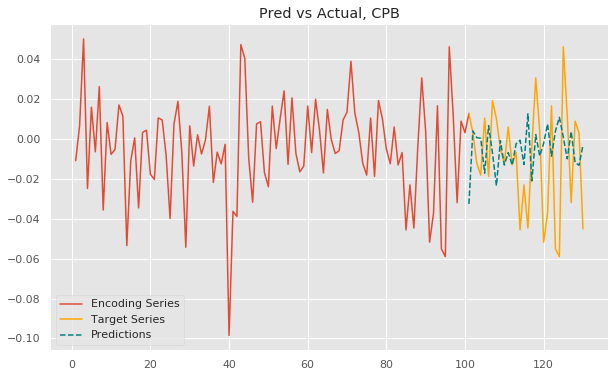

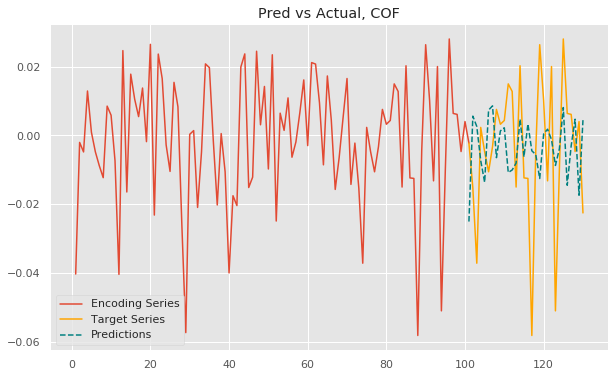

In [40]:
for i in range(60, 90):
#     i = tickers.index(ticker)
    predict_and_plot(encoder_input_data, decoder_target_data, 
                 sample_ind=i, enc_tail_len=100)